In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
pip install dpcpp-cpp-rt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [19]:
data1 = pd.read_csv("bengaluru_house_prices.csv")
data1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [20]:
data1.shape

(13320, 9)

In [21]:
data1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [22]:
data1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [23]:
data1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<b> Features that are not required to build our mode</b>

In [24]:
data2 = data1.drop(['area_type','society','balcony','availability'],axis='columns')
data2.shape

(13320, 5)

<b>Data cleaning(Null values or Handle missing)</b>

In [26]:
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [27]:
data2.shape

(13320, 5)

In [28]:
data3 = data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [29]:
data3.shape

(13246, 5)

## Feature Engineering
<b>Adding a new feature for bhk </b>

In [30]:
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))
data3.bhk.unique()

/home/u187884/tmp/ipykernel_2620651/2315115284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

### More on total_sqft feature

In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
2+3

5

In [33]:
data3[~data3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

#### Above shows that total_sqft can be a range. Such cases we can take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [34]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [35]:
data4 = data3.copy()
data4.total_sqft = data4.total_sqft.apply(convert_sqft_to_num)
data4 = data4[data4.total_sqft.notnull()]
data4.head(2)

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4

In [37]:
data4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [38]:
(2100+2850)/2

2475.0

In [ ]:
<b>Above row, it shows total_sqft as 2475 which is an average of the range 2100-2850</b>

<font color=blue><b>Feature Engineering</b></font>

In [39]:
data5 = data4.copy()
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']
data5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [40]:
data5_stats = data5['price_per_sqft'].describe()
data5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [41]:
data5.to_csv("bhp.csv",index=False)

<b>We are applying dimensionality reduction technique here to reduce number of locations</b>

In [44]:
data5.location = data5.location.apply(lambda x: x.strip())
location_stats = data5['location'].value_counts(ascending=False)
location_stats


Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [45]:
location_stats.values.sum()

13200

In [46]:
len(location_stats[location_stats>10])

240

In [47]:
len(location_stats)

1287

In [48]:
len(location_stats[location_stats<=10])

1047

<font color="blue"><b>Dimensional Regression</b></font>

<b>Location having less than 10 data points should be tagged as "None" location. This will reduce number of categories. Later on when we do one hot encoding, it will help us with having fewer dummy columns</b>

In [52]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [54]:
len(data5.location.unique())

1287

In [55]:
data5.location = data5.location.apply(lambda x: 'None' if x in location_stats_less_than_10 else x)
len(data5.location.unique())

241

In [56]:
data5.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

<font color="blue"><b>Outlier Removal Using Business Logic</b></font>

<b>As a data scientist when you have a conversation with your business manager, he will tell you that normally square ft per bedroom is 300 

In [58]:
data5[data5.total_sqft/data5.bhk<300].head()

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

<b>Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely</b>

In [60]:
data5.shape

(13200, 7)

In [61]:
data6 = data5[~(data5.total_sqft/data5.bhk<300)]
data6.shape

(12456, 7)

<font color="blue"><b>Outlier Removal Using Standard Deviation and Mean</b></font>

In [62]:
data6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<b>Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, to avoid wide variation.We can remove outliers per location using mean and one standard deviation</b>

In [79]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data7 = remove_pps_outliers(data6)
data7.shape

(10242, 7)

<b>Below shows the prices of 2BHK and 3BHK for a particular location</b>

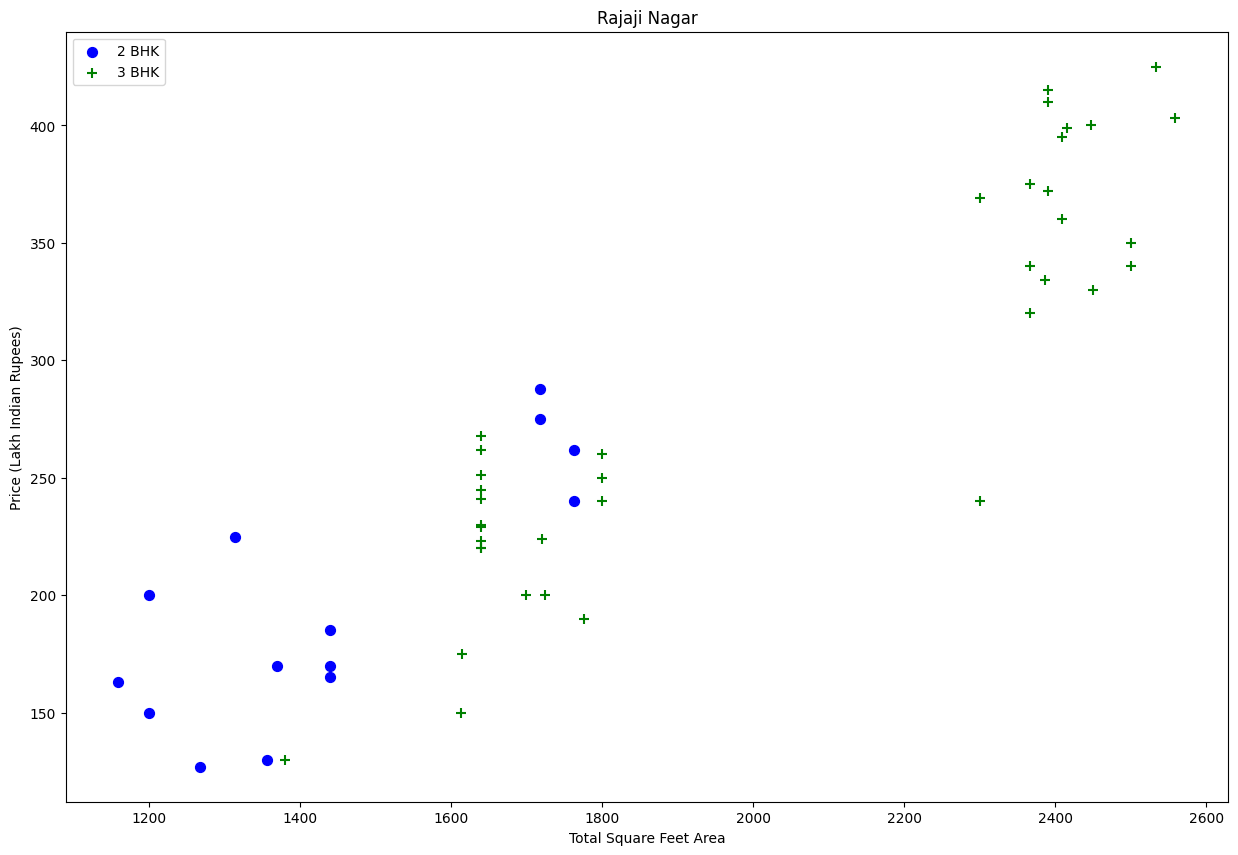

In [80]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data7,"Rajaji Nagar")

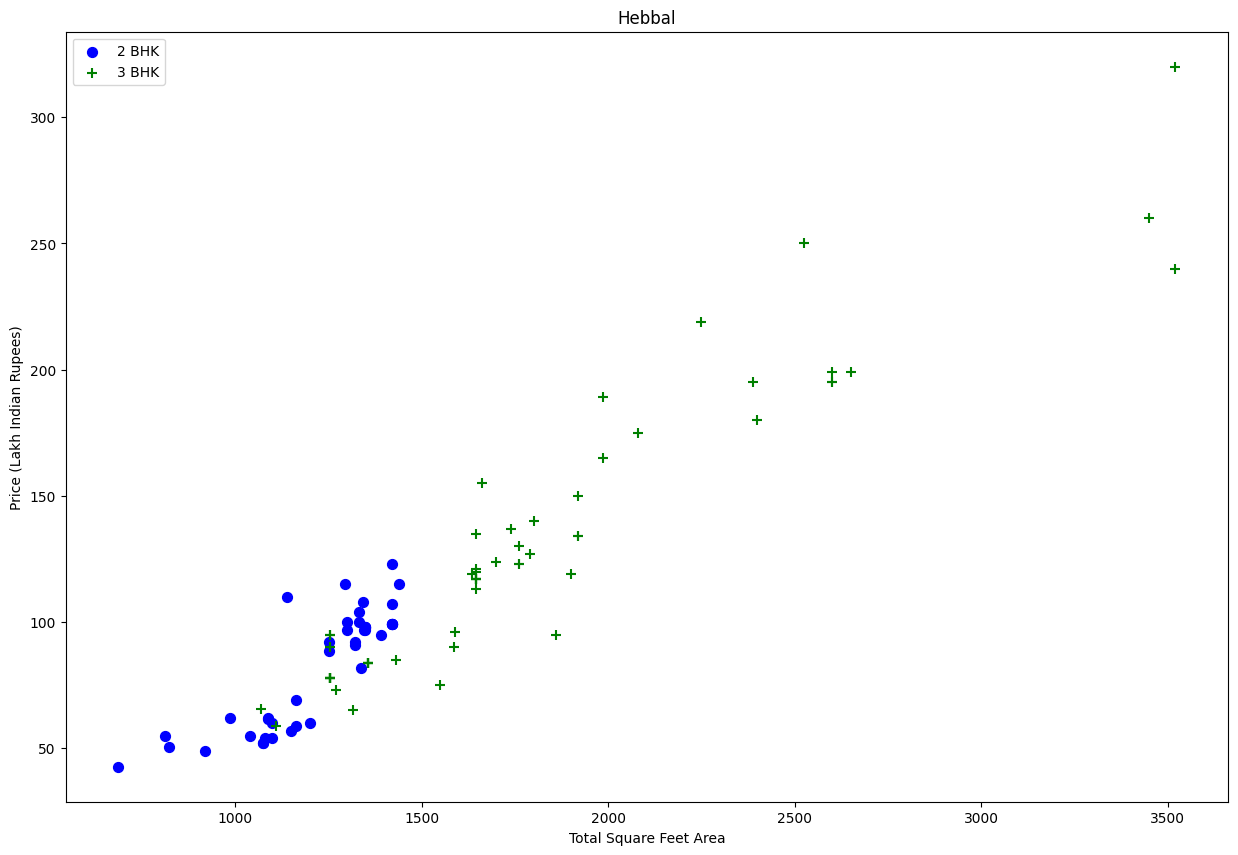

In [82]:
plot_scatter_chart(data7,"Hebbal")

<b>We should also remove properties where for same location, the price of 3 bedroom apartment is less than 2 bedroom apartment. What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.</b>

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

<b>Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment</b>

In [85]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data8 = remove_bhk_outliers(data7)

data8.shape

(7317, 7)

<b>Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties</b>

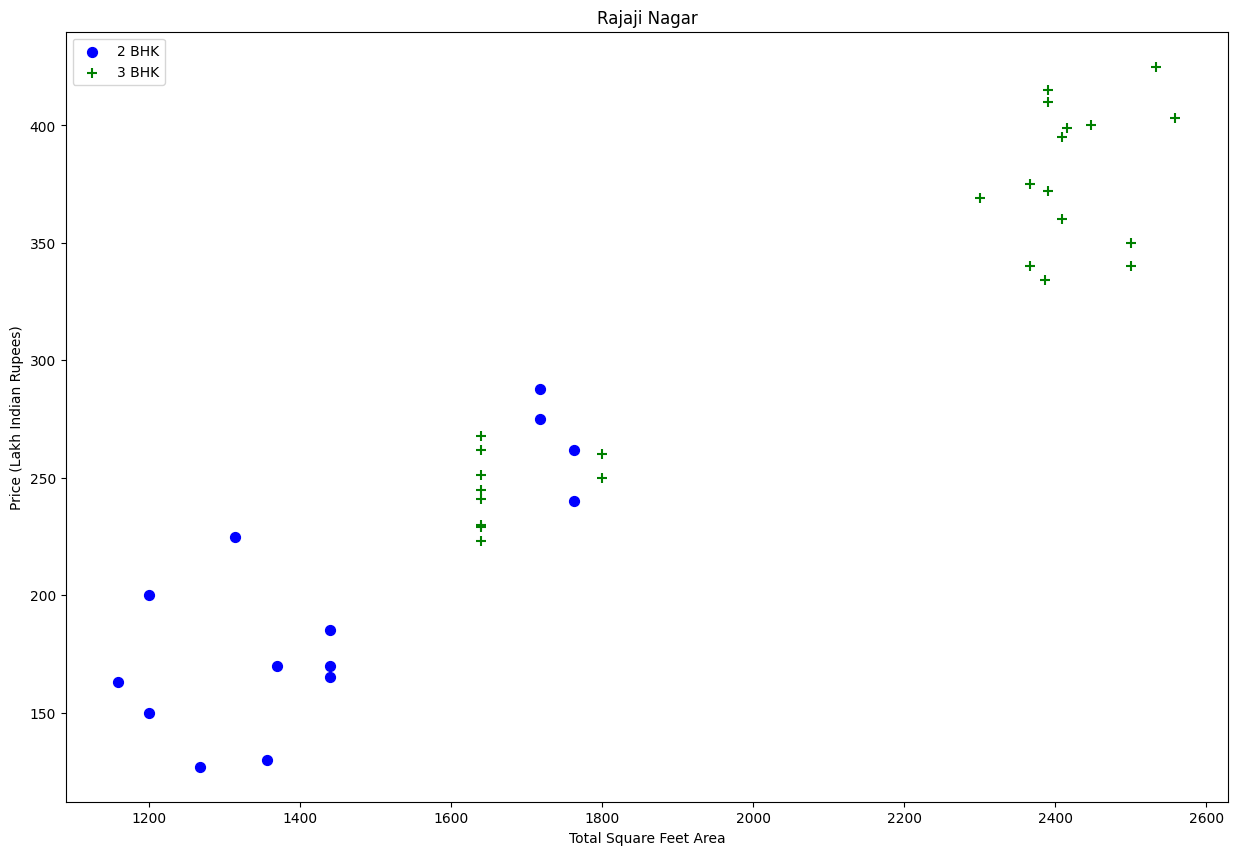

In [88]:
plot_scatter_chart(data8,"Rajaji Nagar")

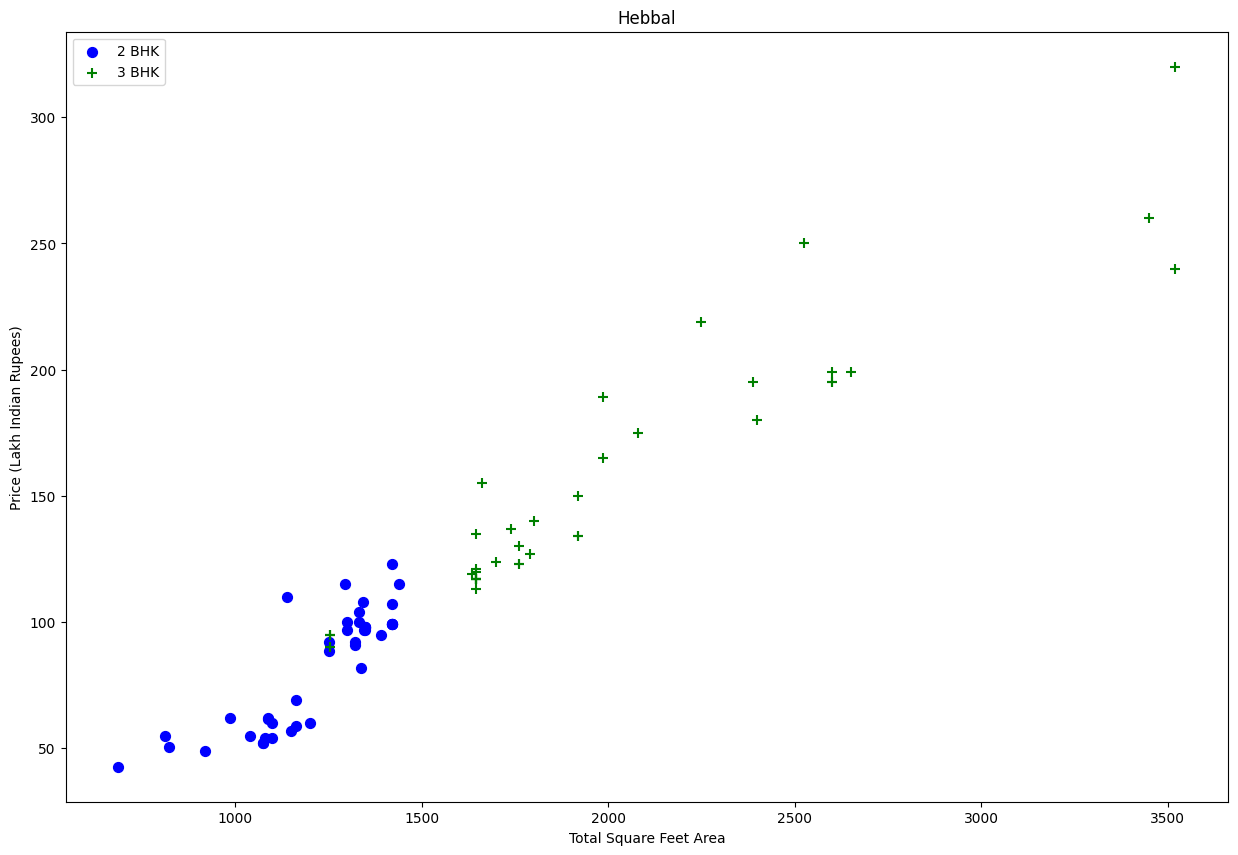

In [89]:
plot_scatter_chart(data8,"Hebbal")

<b>Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function</b>

<font color="green"><b>Before and after outlier removal: Rajaji Nagar</b></font>

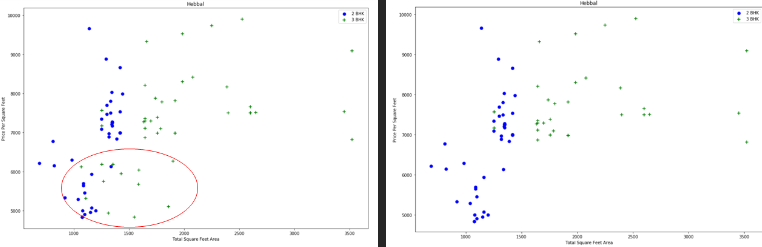

In [95]:
from IPython.display import display, Image

image_path = 'Hebal.png'
image = Image(filename=image_path)
display(image)

<font color="green"><b>Before and after outlier removal: Hebbal</b></font>

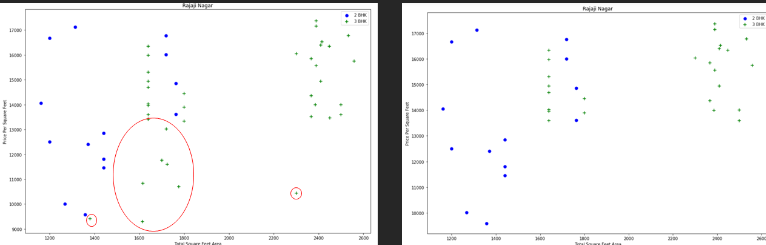

In [94]:
from IPython.display import display, Image

image_path = 'Rajajinagar.png'
image = Image(filename=image_path)
display(image)

Text(0, 0.5, 'Count')

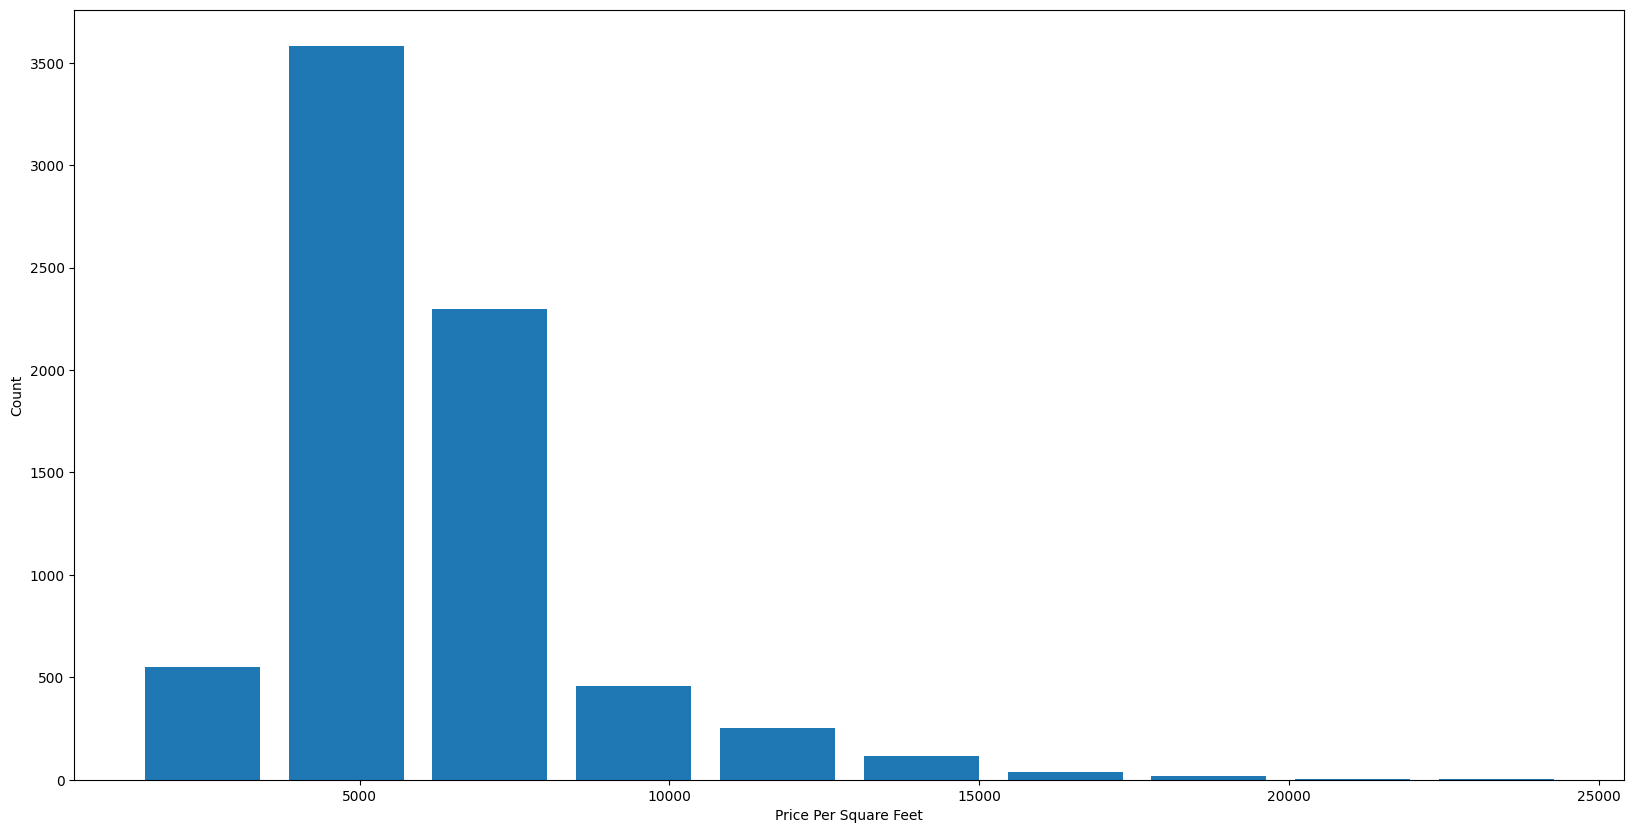

In [99]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

<font color="blue"><b>Outlier Removal Using Bathrooms Feature</b></font>

In [101]:
data8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

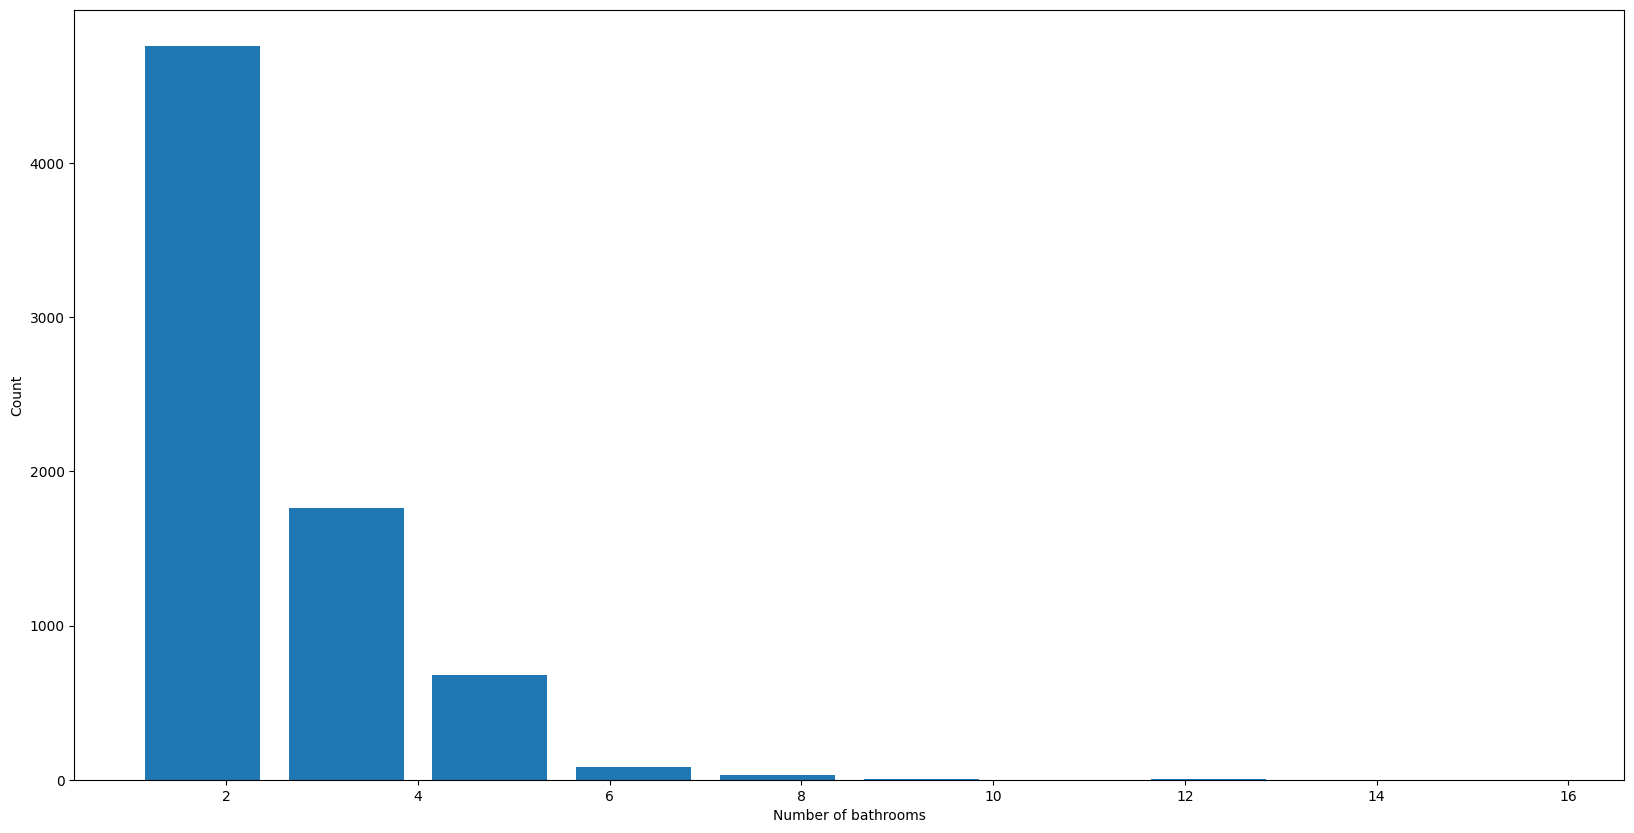

In [102]:
plt.hist(data8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [105]:
data8[data8.bath>10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8483           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8572           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9306           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9637           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

<b>It is unusual to have 2 more bathrooms than number of bedrooms in a home</b>

In [106]:
data8[data8.bath>data8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8408          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

<b>The business manager stated that a home with 4 bedrooms and one guest bathroom, where each bedroom has its own bathroom, should have a total number of bathrooms equal to the total number of bedrooms plus one. Any value greater than this could be considered an outlier or a data error and may be appropriate to remove from analysis.</b>

In [107]:
data9 = data8[data8.bath<data8.bhk+2]
data9.shape

(7239, 7)

In [108]:
data9.head(2)

location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491

In [109]:
data10 = data9.drop(['size','price_per_sqft'],axis='columns')
data10.head(3)

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3

<font color="blue"><b>Use One Hot Encoding For Location</b></font>

In [110]:
dummies = pd.get_dummies(data10.location)
dummies.head(3)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  

[3 rows x 241 columns]

In [111]:
data11 = pd.concat([data10,dummies.drop('other',axis='columns')],axis='columns')
data11.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [113]:
data12 = data11.drop('location',axis='columns')
data12.head(2)

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  

[2 rows x 244 columns]

<font color="blue"><b>BUILD A MODEL</font></b>

In [115]:
data12.shape

(7239, 244)

In [116]:
X = data12.drop(['price'],axis='columns')
X.head(3)

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1875.0   2.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  

[3 rows x 243 columns]

In [117]:
X.shape

(7239, 243)

In [118]:
y = data12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [119]:
len(y)

7239

<b>Seperating features and target label</b>

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [121]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229445

<font color="blue"><b>Use K Fold cross validation to measure accuracy of our LinearRegression model</font></b>

In [128]:

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

<b>We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose</b>

<font color="blue"><b>Find best model using GridSearchCV</b></font>

In [129]:

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, us

model  best_score                               best_params
0  linear_regression    0.847796                       {'normalize': True}
1              lasso    0.726738       {'alpha': 2, 'selection': 'random'}
2      decision_tree    0.718249  {'criterion': 'mse', 'splitter': 'best'}

<b>Based on above results we can say that LinearRegression gives the best score. Hence we will use that.</b>

<b>Model Performance Comparison</b>

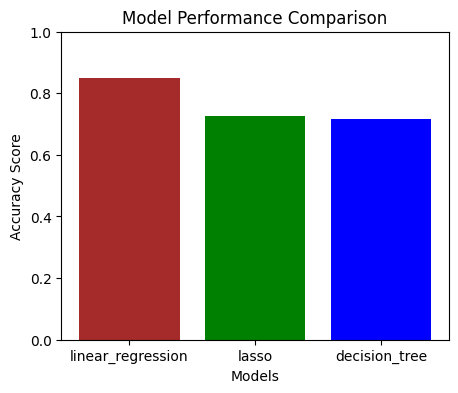

In [15]:
import matplotlib.pyplot as plt

models = ['linear_regression', 'lasso', 'decision_tree']
fig = plt.figure(figsize=(5, 4))

scores = [0.847796, 0.726738,0.716064]

# Define a list of colors for each bar in the chart
colors = ['brown', 'green', 'blue']-

# Create a bar chart with the data and colors
plt.ylim([0.0, 1.0])
plt.bar(models, scores, color=colors)

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

plt.show()


<font color="blue"><b>Test the model for few properties</b></font>

In [134]:
from sklearnex import patch_sklearn
patch_sklearn()
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [137]:

predict_price('1st Phase JP Nagar',1000, 2, 2)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258313682

In [138]:

predict_price('1st Phase JP Nagar',1000, 3, 3)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.08062284988459

In [139]:
predict_price('Indira Nagar',1000, 2, 2)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.3119773318093

In [140]:
predict_price('Indira Nagar',1000, 3, 3)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.52689759855707

<font color="blue"><b>Export the tested model to a pickle file</b></font>

In [166]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

<font color="blue"><br>Export location and column information to a file that will be useful later on in our prediction application</b></font>

In [148]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))